
# Overview

This interactive SageMath worksheet will explain how to define variables and functions, evaluate and plot functions, as well as finding derivatives and integrals of symbolic functions.  We will use the quantum mechanical wave function of a free particle as an example.

Goals of this activity:

- Plot the real and imaginary elements of the free particle wave function $\psi(x,t) = A_0 e^{i(kx - \omega t)}$
- Create an animated plot of the wave function
- Check that the wave function satisfies the Schrodinger's equation

Schrodinger's equation for a one-dimensional system (e.g. think of an electron confined to a nanowire) is $\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \psi(x,t) +V(x)\psi(x,t) = i\hbar \frac{\partial}{\partial t} \psi(x,t)$.

A free particle is a particle that does not experience any forces along the direction of motion and can move freely without any walls.  In truth there is no such thing as a free particle since all particle are confined in some ways but as long as the dimensions of confinement are much much larger than the wavelength of the particle we can treat the particle as free.  An electron confined to a nanowire with a length on the order of millimeters would be a good example of this.

# Defining variables and functions


- All variables must be explicitly declared (except for the variable 'x' and variables used as arguments of functions) using the **var()** command
- Variables cannot start with numbers or contain spaces but they can contain underscores
- Functions can be evaluated by inserting values for the arguments
- To evaluate an input cell in this worksheet, put the cursor in the cell and hit Shift+Enter.  The output will be displayed in the cell below the input cell.

#### What is the free particle wave function solution to Schrodinger's equation?

The general solution to Schrodinger's equation is $\psi(x,t) = A_0 e^{i(kx-\omega t)} + B_0 e^{i(kx + \omega t)}$ where the only difference between the two terms is the sign in front of $\omega t$, which determines which direction the wave travels.  For the moment we will only look at the first term by setting $B_0=0$.

In [ ]:
#This is a calculation input cell.  SageMath will operate on anything typing into this cell and output the results in the cell below.
#Insert the cursor in this cell and hit Shift-Enter to evaluate it.
# Any text after the hashtag is ignored by SageMath

A_0,k,omega, m = var('A_0,k,omega, m')  #Variables are defined using the 'var()' command.

psi(x,t) = A_0*exp(i*(k*x - omega*t))  #This is a how you define a function.  Arguments of the function are placed in parentheses.
psi(x,t) # When a function is defined SageMath does not output the equation.  
psi(x,t).show() 

psi(0,0)  #Functions are evaluated by plugging in values for the arguments.  
            # Notice that the wave function at x=0, t=0 has the value of A_0
s(psi(0,0))  #Nicer looking output

A_0*e^(-I*omega*t + I*k*x)

<IPython.core.display.Math object>

#  Plotting functions


- To replace variables with numerical values you need to use the **.substitute()** command.
    - To replace all values of the variable $A_0$ with the value $1$, append '.substitute(A_0=1)' to the function name.
- The real and imaginary parts of a function can be obtained by using **.real()** and **.imag()**.
- Since SageMath is based on Python, everything is an object.  This means that you can modify properties or act on things using the "dot" notation.

#### What does the free particle wave function look like?

The solution to Schrodinger's equation must be a complex function so the wave function must be split into it's real part and imaginary part to plot the function.  The free particle wave function for a one-dimensional system is $\psi(x,t) = e^{i(kx -\omega t)}$.  What do you think the graph of the real part of the wave function will look like?  What do you think the imaginary part of the wave function will look like?  (Hint: What is Euler's identity?)

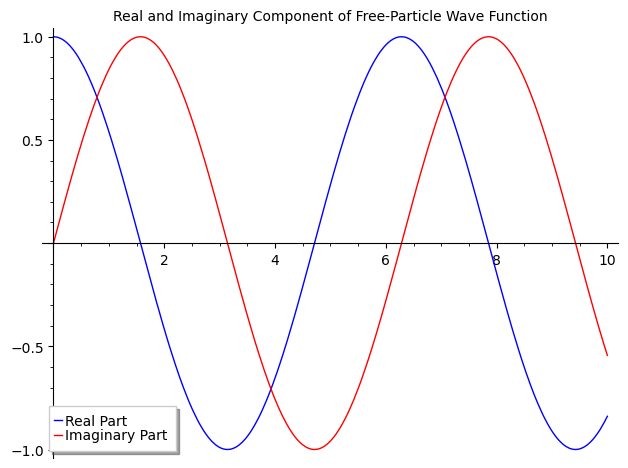

In [3]:
#Plotting the real and imaginary parts of the wave function
psi_plot(x,t) = psi(x,t).substitute(A_0=1,k=1,omega=1)  #Since psi was defined with variable values for A_0, k, and omega, 
                    # we must use the '.substitute()' command to change the variables into numerical values
#psi_plot(x,t) is the same function as psi(x,t) with A_0=1, k=1, and omega=1

psi_plot_Re(x,t)=(psi_plot(x,t)).real()  #The '.real()' command extracts the real component of the function
psi_plot_Im(x,t)=(psi_plot(x,t)).imag() #The '.imag()' command gets the imaginary component

P1=plot(psi_plot_Re(x,0),x,0,10,legend_label='Real Part', title='Real and Imaginary Component of Free-Particle Wave Function')
P2=plot(psi_plot_Im(x,0),x,0,10,legend_label='Imaginary Part',color='red')
P=P1+P2  #Combine the two graphs into one plot
P.show()  #Show the plot

## For you to try:

Use the fact that $e^{i \theta} = \cos(\theta) + i \sin(\theta)$ to plot the real part of the wave function at time $t = 1$.  Type your work into the input cell below.

How does your graph for the real part of the wave function compare to the graph of the real part above?  What function do you think represents the imaginary part of the free particle wave function?

In [0]:
#Add your work here

#   Animating plots
- A collection of still images can be combined to create an animation
- Put all images in a list (square brackets denote a list)
- Use the list of images as an argument to the `animage(list_of_images_here)` command

#### Which way is the free particle wave function moving?

To determine the direction that the wave is moving you can create an animated plot at different times using a short Python script.  You will need to create a list of plot snapshots at different times and then combine them into an animation.

In [4]:
times = sxrange(0,5,0.5)     #Create a list of the times for evaluation. sxrange() creates a list of numbers from 0 to 5 in steps of 0.5
plot_graph = []   #Create an empty list to store the plotted graphs at different times

for t in times:    #Loop through all times
    new_plot=plot(psi_plot_Re(x,t),x,0,10)+plot(psi_plot_Im(x,t),x,0,10,color='red')   #Create plot at time t for each value of t
    plot_graph.append(new_plot)    #Add the new plot to the final list

a=animate(plot_graph)    #Combine all plots contained in plot_graph into an animation
a.show()  #Show the animation

/home/tom/miniconda3/envs/sage-env/lib/python3.12/site-packages/sage/repl/rich_output/display_manager.py:594: RichReprWarning: Exception in _rich_repr_ while displaying object: Error: Neither ImageMagick nor ffmpeg appear to be installed. Saving an animation to a GIF file or displaying an animation requires one of these packages, so please install one of them and try again. See www.imagemagick.org and www.ffmpeg.org for more information.
  warnings.warn(


Animation with 10 frames


### Note:

You can accomplish the same thing with more compact code using Python list comprehensions:

    plot_graph = [plot(psi_plot_Re(x,t),x,0,10)+plot(psi_plot_Im(x,t),x,0,10,color='red') for t in sxrange(0,5,.5)]
    a=animate(plot_graph)
    a.show()


#   Working with complex functions



- Assumptions about variables can be specified using the **assume()** command.  In this case we assume all variables are real.
- The complex conjugate can be found using **.conjugate()**.
- **print()** and **pretty_print()** can be used to include text in an output cell.

#### Calculate the probability density for the free particle wave function

The wave function \(\psi(x,t)\) is called the probability amplitude of the particle.  The probility density \(\rho(x,t)\) is equal to the magnitude of the probability amplitude squared.  Since \(\psi(x,t)\) is complex, the magnitude squared _is not the same as_ the square of \(\psi(x,t)\).  You must multiply \(\psi(x,t)\) by it's complex conjugate, which is written as \(\psi^*(x,t)\).  The probability density is then given by \(\rho(x,t) = \psi^*(x,t) \psi(x,t)\).

How would you find the probability to find a particle between two points given the probability density?  In other words, how is the probability density related to the probability to find the particle within some region of space?

In [ ]:
#All of these quantities are real.  We need to specify that they are real because we will calculate the complex conjugate of psi(x,t)
#Without assumption that these variables are real, rho(x,t) below will not simplify to A_0^2
assume(omega,'real')
assume(k,'real')
assume(x,'real')
assume(t,'real')
assume(A_0,'real')

rho(x,t)=psi(x,t)*psi(x,t).conjugate() #When defining a function, the results are not printed out ...
rho(x,t)  #... so you'll need to call the function to get SageMath to print it in the output cell

print('The probability density rho(x,t) for a free partile is', rho(x,t))

#You can typeset the print statement using Latex by calling 'pretty_print()'...
pretty_print('The probability density $\\rho(x,t)$ for a free particle is', rho(x,t))

#Notice that print only requires quote marks around text while pretty_print() uses parentheses and quote marks

RuntimeError: ECL says: declare: argument must be a symbol or a string; found: 4.5



# For you to try:

SageMath has a help system that is easy to use.  To figure out how to use a command, type the name of the command followed by the question mark '?'.

SageMath also has an autocomplete feature where you can hit the first few letters of a command followed by the Tab key to get a list of possible commands.  These two tools used together can help you tremendously.

- To see what other assumptions you can make, type 'assume?' into the input cell below.

- To get help with the **integral()** command, first type 'int' and then hit Tab to use autocomplete.  Select 'integral' from the pop-up list and add a question mark to the end before evaluating the cell by hitting Shift+Enter

In [0]:
#Input your work here


#  Taking derivatives of functions

- The command **.derivative()** will find the derivative of a symbolic function.
- The arguments of the **.derivative()** command are the variable of differentiation and the order of the derivative
    - To find the third derivative of the function $f$ with respect to $x$ use:

           f.derivative(x, 3)

The output from the **.derivative()** command is another function, which you can evaluate or set equal to another variable.

In [0]:
psi.derivative(x,1)  #Taking the first derivative with respect to x
psi.derivative(x)  #First order derivative is assumed if no number is given
psi.derivative()  #If you don't specify the differentiation variable, SageMath will return a list with all possible derivatives

psi(x,t).derivative(x)  #If you explicitly include the arguments of the function the result will be returned without (x,t) |-->


psi.derivative(x)(x=1,t=1)  #You can evaluate the derivative at a point but specifying the values for x and t...

psi_prime = psi.derivative(x)   #... or you can define your result as a new function...
psi_prime(1,1)    #... and evaluate this new function at the point x=1, t=1


### Note:

Rather than using the "dot" notation, you can treat the **derivative()** command as a function.  You can also use **diff()** in place of **derivative**; the results are the same for both commands.

- Here are a couple of examples that are all equivalent:

      derivative(f,x,2)

      diff(f,x,2)

      f.derivative(x,2)

      f.diff(x,2)


#   Defining functionals involved derivatives

Another way to define functions is using Python commands.
- Definition must start with **def** followed by the name of the function and the arguments of the function.
- First line of function definition must end with a colon **:**
- All code included in the function must be indented four spaces (one tab)
- Last line of function defintion must return resulting equation

#### Momentum Operator

In quantum mechanics, all observable quantities have an associated operator.  These operators require a wave function to operate on.  The momentum operator in one-dimension is defined as \[\hat{p}=-i\hbar \frac{d}{dx}\].  The value of the momentum \(p\) is found by applying the operator to the wave function.  In other words, \[p\psi(x,t) = \hat{p} \psi(x,t)\] or, dividing both sides by \(\psi(x,t)\), \[p=\frac{\hat{p}\psi(x,t)}{\psi(x,t)}.\]  Notice that \(\psi(x,t)\) doesn't cancel out the \(\psi(x,t)\) in the numerator because the numerator is \(\hat{p}\) *operating* on \(\psi(x,t)\) which is different than multiplying the two terms together.

The momentum of a free particle is given by \(\hbar k\), which is what the following calculation demonstrates.

In [0]:
hbar=var('hbar',latex_name=r'\hbar')  #This extra defintion will display the hbar symbol when using .show() or pretty_print

def P(f):   #This will define the momentum operator P
    return -i*hbar*diff(f,x)    #The function returns -i*hbar*diff(f,x) when called

P(psi)  #Calculating momentum using P-operator.  Notice the function psi appears inside parenthese to indicate P is operating on the function
P(psi).show()  #A nicer looking output
P(psi(x,t)).show()  #Notice that if I explicitly include the arguments of psi that (x,t) |--> is not included in the output

momentum = P(psi(x,t))/psi(x,t)
pretty_print('The momentum of a free particle is $p=$', momentum)


# For you to try:

Schrodinger's equation is given by \[\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \psi(x,t) +V(x)\psi(x,t) = i\hbar \frac{\partial}{\partial t} \psi(x,t).\]  In order to demonstrate that \(\psi(x,t) = A_0 e^{i(kx - \omega t)}\) satisfies this equation, you need to plug this equation for \(\psi(x,t)\) into both sides of the equation and show both sides are equal to one another.

First, take the second derivative of the wave function $\psi(x,t)$ with respect to $x$ in the cell below.  Multiply this by $-\hbar^2/(2m)$.  This will give you the left-hand side of Schrodinger's equation.

Next find the first derivative of $\psi(x,t)$ with respect to $t$.  Multiply this result by $i \hbar$ to get the right-hand side of Schrodinger's equation.   Compare this equation to the previous equation.  The two equations should agree if you recognize that $\omega = \hbar k^2/(2m)$.

Use **.substitute(omega = hbar k^2/(2*M))** on this second equation and both equations should match, showing that this wave function satisfies Schrodinger's equation.

In [0]:
#Insert your work here


# Another exampe of defining functionals involving derivatives

We will use the Python **def** command again to define our two functions.   To define the Hamiltonian operator $\hat{H} = \frac{-\hbar^2}{2m} \frac{d^2}{dx^2} $ we would use a Python definition that returns the desired function.  We can define the energy operator $\hat{E} = -i \hbar \frac{d}{dt}$ in a similar fashion.  These two functions can then be used to find $\hat{H}\psi(x,t)$ and $\hat{E}\psi(x,t)$

#### Defining Schrodinger's equation in SageMath

The left-hand side of Schrodinger's equation is called the Hamiltonian which you may have heard of in a classical physics course.  The Hamiltonian \(\hat{H}\) and energy \(\hat{E}\) are operators which must have a function to operate on.  In this worksheet we use the hat symbol \(\hat{}\) above the letter to indicate an operator but your instructor may use different notation.  The operator \(\hat{H}\) is called 'H-hat'.

In terms of operators, Schrodinger's equation can be written as \(\hat{H}\psi(x,t) = \hat{E} \psi(x,t)\) where we understand that \(\hat{H}\) and \(\hat{E}\) operator on the functions immediately to their right.

In [0]:
hbar=var('hbar',latex_name=r'\hbar')  #This extra defintion will display the hbar symbol when using .show() or pretty_print


def H(f):    #The first line of the definition must include the name of the function, the variables, and end with a colon
    return -hbar^2/(2*m)*diff(f,x,2)   #all lines that make up the function must be indented four spaces (one tab); this is a requirement of Python


def E(f):   #This function is the right-hand side of Schrodinger's equation
    return i*hbar*diff(f,t)



Hamil_term=H(psi(x,t))   #Calculate the Hamiltonian operating on psi
Ener_term=E(psi(x,t))    #Calculate the energy operator on psi

Hamil_term.show()    #Show pretty versions of H(psi)
Ener_term.show()     #Show a pretty version of E(psi)


# <img src="sagemathcloud_logo1.png" width="48"> Solving algebraic equations

- When solving equations you must remember the difference between $==$ and $=$.
    - The 'double-equals' sign $==$ is a comparison and is what you should use with the **solve()** command.
    - The "single-equals' sign $=$ is an assignment operator and sets the left hand side to the value on the right.
- The arguments of **solve()** are the equation to solve and the variable to solve for.
- Type **solve?** into an input cell to see the other options available for the **solve()** command.

#### Find the values of \(k\) that satisfy Schrodinger's equation

We've already specified the equation that relates \(k\) and \(\omega\) but the following will show you how to use SageMath to find this relation using Schrodinger's equation.  We'll use the previous definitions of \(H\) and \(E\) along with \(\psi(x,t)\) to find \(k\).

In [0]:
ans = solve(H(psi(x,t))==E(psi(x,t)),k)
show(ans)

print "Here are two other examples using the solve command"
ans2 = solve(cos(k*x)==0,x)
pretty_print("The solution to $cos(k*x)=0$ is ", ans2 )  #This only gives one answer.  This equation holds true for *any* integer multiple of this answer.

ans3 = solve(x^2+x==6,x)
pretty_print("The solutions to $x^2+x = 6$ are ",ans3)


# For you to try:

Solve the equation \(H \psi(x,t) == E \psi(x,t)\) for **omega** rather than **k** and show the result is \(\omega = \frac{\hbar^2 k^2}{2m}\).

In [0]:
#Insert your work here

# <img src="sagemathcloud_logo1.png" width="48"> Extract a solution from a list of answers


- The solution from the **solve()** command is a Python list and we can extract elements of the equations from the list.  Python starts indices at 0 rather than 1 so the first element in *ans* is *ans[0]* and the second element is *ans[1]*.
- You can extract the **r**ight **h**and **s**ide of an equation using **.rhs()**.
- To see if the equation holds true we need to compare the two sides using a double equals sign (==) and force SageMath to give us a Boolean answer by using **bool()**.

#### Double-check that $k$ satisfies the wave equation

To help practice using SageMath, we will take the solution obtained for \(k\) and plug it back into Schrodinger's equation (again).

In [0]:
ans[0].show()  #Extract first equation from list of solutions
ans[1].show()  #Extract second equation from list of solutions

k1 = ans[0].rhs()   #Extract right-hand side of first solution...
k1.show()   #... and show the typeset version

k2 = ans[1].rhs()   #Extract right-hand side of second solution...
k2.show()        #... and make it look nice


t_or_f1=bool(H(psi(x,t).substitute(k=k1))==E(psi(x,t).substitute(k=k1)))   #Check if the two equations are equal for solution k1...
pretty_print("$k_1$ satisfies the Schrodinger equation:", t_or_f1)    #... and print the results


t_or_f2=bool(H(psi(x,t).substitute(k=k2))==E(psi(x,t).substitute(k=k2)))   #Check if the two equations are equal for solution k2...
pretty_print("$k_2$ satisfies the Schrodinger equation:", t_or_f2)    #... and print the results


# <img src="sagemathcloud_logo1.png" width="48"> Integrating a function



- The command to integrate is **.integrate()** or you can apply **integrate()** as a function to the equation.
- For an indefinite integral you only need to specify the variable of integration
- For a definite integral you must specify the variable of integration and the limits.
     - For example, to integrate the function \(f(x)\) from \(x=0\) to \(x=L\) you'd type:
             integrate(f(x),[x,0,L])


### Normalize the wave function and find the probability to find the free particle between to points in space

To normalize the wave function, the total probability to find the particle _somewhere_ must equal 1.  Unfortunately with the free particle you run into an issue because the free particle can be anywhere between $-\infty$ and $\infty$.  Using these limits results in a divergent integral.  To get around the infinite integral we will consider the case where the particle is limited to some region between $x=+L$ and $x=-L$ where $L \gg \lambda$ where $\lambda$ is the wavelength of the free particle.

In [0]:
norm_integral_1 = integrate(psi*psi.conjugate(),x); norm_integral_1    #Set the value of the indefnite integral equal to norm1 and then display norm1
solve(norm_integral_1 ==1,A_0)  #Solve for the values of A_0


L=var('L')  #Define L as a variable
assume(L,'real')  #Specify that L is a real quantity
norm_integral_2 = integrate(psi*psi.conjugate(),[x,-L,L]);norm_integral_2   #Solve the definite integral using -L and L as the lower and upper bounds
norm_const=solve(norm_integral_2==1,A_0);norm_const  #Solve for A_0
pretty_print("If the particle is confined to a region of length 2L, the normalization constant $A_0$ is ", norm_const[1].rhs() )

pretty_print("The wave function \(\psi(x,t)\), including the normalization constant is \(psi(x,t)=\)", psi(x,t).substitute(A_0=norm_const[1].rhs()))


# Other ways to do things

In addition to using the "dot" notation to operate on functions, you can also use various operations as functions.  For instance, *derivative(psi,x)* gives the same result as *psi.derivative(x)*

In [0]:
psi.derivative(x,2)
derivative(psi,x,2)

psi.integrate(x)
integrate(psi,x)

psi.real()
real(psi)

psi.imag()
imag(psi)

psi.show()
show(psi)


# <img src="sagemathcloud_logo1.png" width="48"> Project Ideas and Problems to Solve

1. Have students find realistic values for masses and velocities for electrons, protons, or neutrons and use de Broglie's equation to find \(k\), \(\omega\), and total energy \(E\).

2. Plot wave functions for electrons and protons on the same plot and have students explain why electron microscopes are used for imaging small objects while 'proton microscopes' aren't as useful.

3. Have students complete homework problems from the end of the textbook chapter.